# Milestone 2

Name : `Sonny Riadi`

Batch : `FTDS-009`

App : [Vegetable Image Classification](https://p2ml2-frontend-sonnyrd.herokuapp.com/)

### Introduction

 **I. project background:**

this project is about to implement the concept of Computer Vision from Convolutional Neural Network. the main library i used is Tensorflow. the task is about to classify the class of the vegetable. this project is to fullfill the assignment of the Hactiv8 Data science Phase 2 Milesone 2.


**Objective :**
1. Able to understand the concept of Computer Vision.
2. Able to prepare data for use in Computer Vision models.
3. Able to implement Artificial Neural Network with existing data.
4. Able to analyze and explain the created layer.



**II. About Dataset**

**Dataset Source :**

the dataset i use in this project is `Vegetable Image Dataset` from [kaggle](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset).  

**Citation**

[Researchgate](https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study)

**Context**

The initial experiment is done with 15 types of common vegetables that are found throughout the world. The vegetables that are chosen for the experimentation are- bean, bitter gourd, bottle gourd, brinjal, broccoli, cabbage, capsicum, carrot, cauliflower, cucumber, papaya, potato, pumpkin, radish and tomato. A total of 21000 images from 15 classes are used where each class contains 1400 images of size 224×224 and in *.jpg format. The dataset split 70% for training, 15% for validation, and 15% for testing purpose.

**Content**

This dataset contains three folders:

train (15000 images)
test (3000 images)
validation (3000 images)
each of the above folders contains subfolders for different vegetables wherein the images for respective vegetables are present.

**Data Collection**

The images in this dataset were collected by us from vegetable farm and market for a project.
Acknowledgements

We would like to give thanks to the people who helped us regarding data collection.

**Inspiration**

From vegetable production to delivery, several common steps are operated manually. Like picking, and sorting vegetables. Therefore, we decided to solve this problem using deep neural architecture, by developing a model that can detect and classify vegetables. That model can be implemented in different types of devices and can also solve other problems related to the identification of vegetables, like labeling the vegetables automatically without any need for human work.

### 2. Import Library

In [5]:
import os
import glob
import numpy as np
import pandas as pd
# import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# model evaluation
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

### 3. Data Loading

we already have the dataset in our directory. so we will load the dataset using tensorflow library`tf.keras.datasets`. Download dataset from kaggle

Create datasets directory

In [6]:
os.listdir('datasets/Vegetable Images')

['train', 'validation', 'test']

In [7]:
main_path = 'datasets/Vegetable Images'

the dataset is already separated into train, test and validation.

In [8]:
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'validation')

### 4. Exploratory Data Analysis (EDA)

In [9]:
# create dataframe for EDA purposes
df_all = []
list_dir = [train_dir, val_dir, test_dir]
for j in list_dir:
        for path, name, file in os.walk(j):
                for f in file:
                        df_all.append((os.path.join(path, f),
                                        path.split('/')[-2],
                                        plt.imread(os.path.join(path, f)).shape,
                                        plt.imread(os.path.join(path, f)).nbytes,
                                        path.split('/')[-1],
                        ))

df_all = pd.DataFrame(df_all, columns=['image path','type','shape','image size(byte)','class'])
df_all.head()

image path   type          shape  \
0  datasets/Vegetable Images/train/Broccoli/0698.jpg  train  (224, 224, 3)   
1  datasets/Vegetable Images/train/Broccoli/0493.jpg  train  (224, 224, 3)   
2  datasets/Vegetable Images/train/Broccoli/0162.jpg  train  (224, 224, 3)   
3  datasets/Vegetable Images/train/Broccoli/0833.jpg  train  (224, 224, 3)   
4  datasets/Vegetable Images/train/Broccoli/0621.jpg  train  (224, 224, 3)   

   image size(byte)     class  
0            150528  Broccoli  
1            150528  Broccoli  
2            150528  Broccoli  
3            150528  Broccoli  
4            150528  Broccoli

##### 4.1 Image Class Analysis

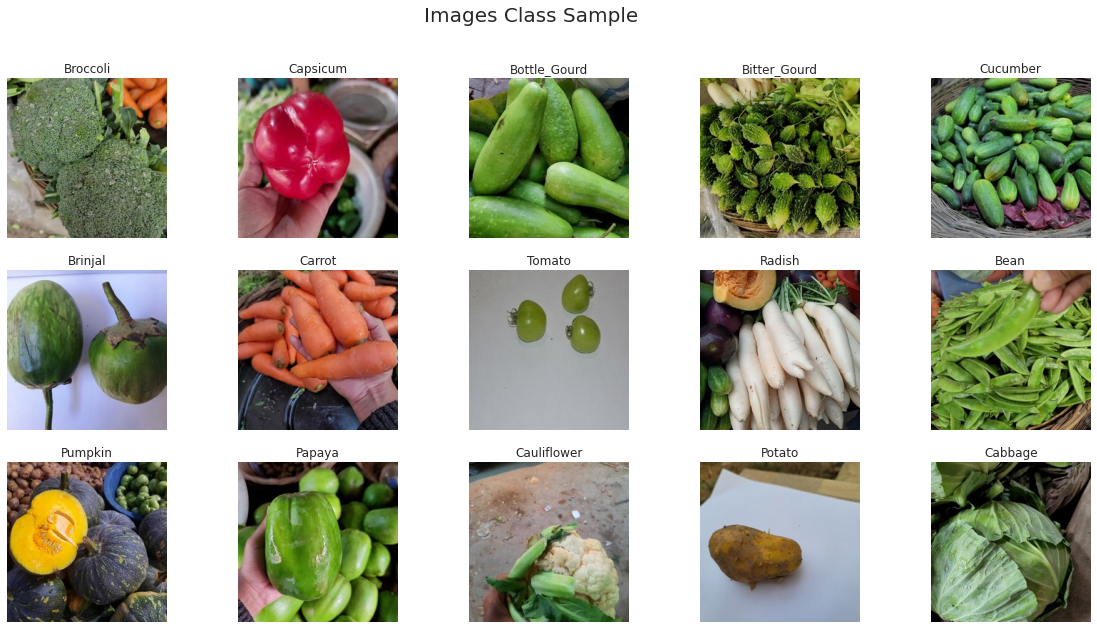

In [58]:
# plot each image
def plot_each_image():
        fig,ax = plt.subplots(nrows=3,ncols=5,figsize=(20,10))
        j = 0
        fig.suptitle('Images Class Sample', fontsize=20)
        for i in list(df_all['class'].unique()):
                randint = np.random.randint(0,1399)
                img = plt.imread(df_all[df_all['class']==i]['image path'].values[randint])
                ax[j//5,j%5].set_title(i)
                ax[j//5,j%5].axis('off')
                ax[j//5,j%5].imshow(img)
                j += 1
                
plot_each_image()

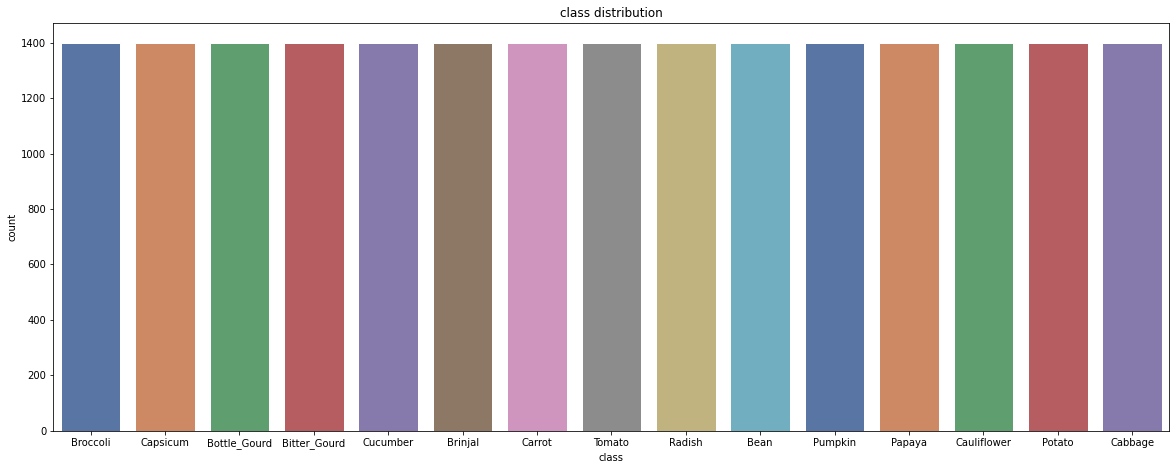

In [11]:
# plot the dataframe
plt.figure(figsize=(20,7.5))
plt.title('class distribution')
sns.set(font_scale=1)
sns.countplot(x='class', data=df_all, palette='deep')
plt.show()

insight :

* we have 15 classes of vegetables.
* each class contains 1400 images.
* the majority of images class  have green color.weInsight :

* we have 15 different classes of veggetables, each class has around 1400 images

#### 4.2 Images Metadata Shapes Analysis

##### Image Shapes

image path
shape                    
(187, 224, 3)           1
(193, 224, 3)           1
(198, 224, 3)           1
(200, 224, 3)           1
(205, 224, 3)           1
(207, 224, 3)           1
(210, 224, 3)           1
(211, 224, 3)           1
(223, 224, 3)           1
(224, 224, 3)       20991

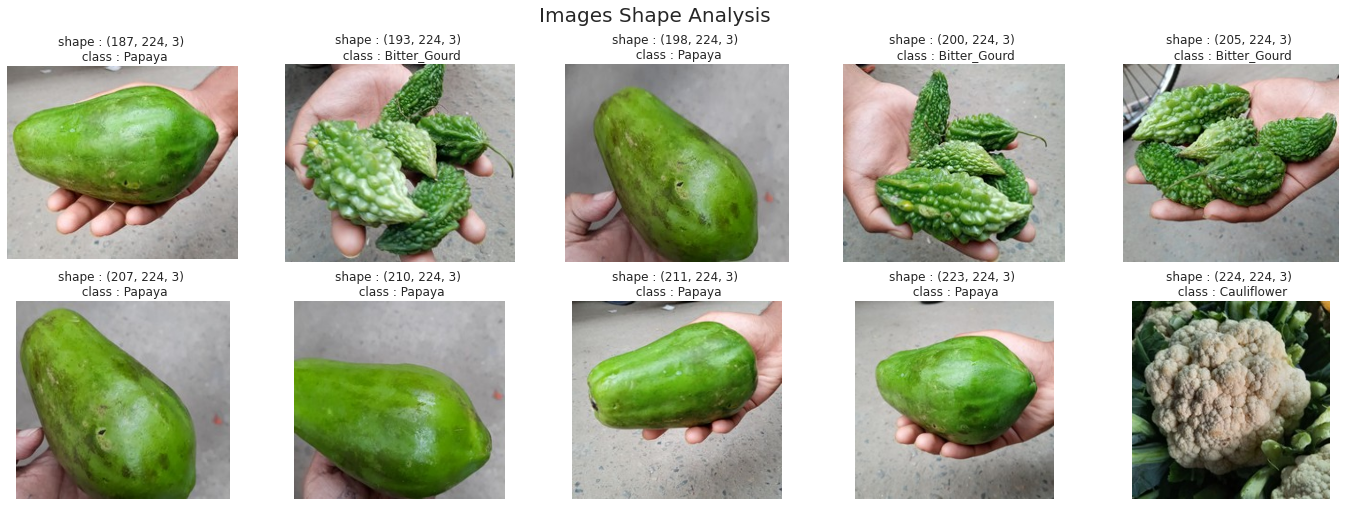

In [12]:
# groupby image shape
image_shape = df_all.groupby('shape')[['image path']].count()

def plot_image_shape():
        # crete list of image shape
        image_shape_list = image_shape.index.tolist()

        fig, ax = plt.subplots(nrows=2,ncols=int(len(image_shape_list)/2),figsize=(24,8))
        fig.suptitle('Images Shape Analysis', fontsize=20)
        for i in range(len(image_shape_list)):
                # query the dataframe
                randint = np.random.randint(image_shape['image path'][i])
                img = plt.imread(df_all[df_all['shape'] == image_shape_list[i]]['image path'].values.item(randint))
                ax[i//5,i%5].set_title(f'shape : {image_shape_list[i]} \n class : {df_all[df_all["shape"] == image_shape_list[i]]["class"].values.item(randint)}')
                ax[i//5,i%5].set_axis_off()
                ax[i//5,i%5].imshow(img)
        
        return image_shape

plot_image_shape()

Insight :

we have 10 types of images shapes, if we see the dataframe, its almost 99.99% of images is belong to 224 * 224 pixel. it's seems only `papaya` and `bitter gourd` have different image shape, the smallest image is 187 * 224 pixel and the largest image is 224 * 224 pixel. 

##### Image Memory Consumption Size

In [13]:
# groupby image size (byte) min and max
image_size = df_all.groupby('type')[['image size(byte)']].agg(['count','min','max','mean'])
image_size

image size(byte)                             
                      count     min     max         mean
type                                                    
test                   3000  139104  150528  150524.1920
train                 15000  129696  150528  150522.3104
validation             3000  125664  150528  150519.4880

Analysis :
* we can see that for data train, validation, and test the average memory consumpstion size of the images is around 150 KB.


##### Image Channel

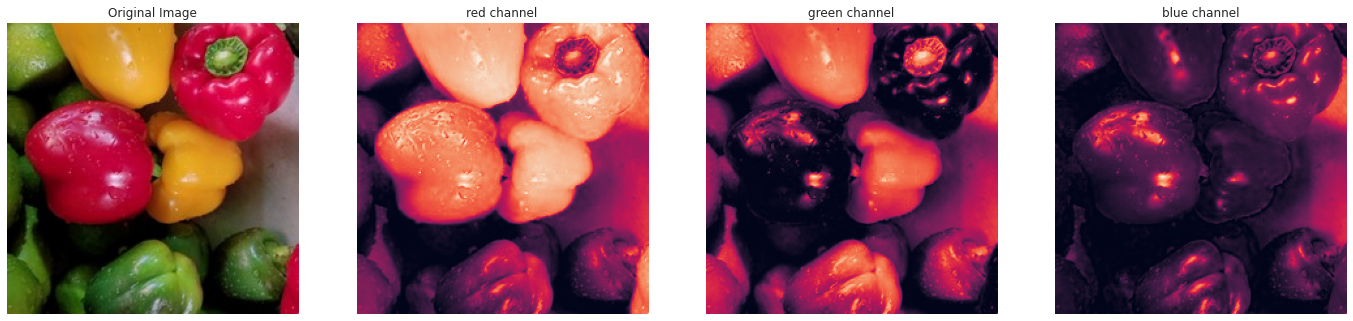

In [14]:
def image_channel():
    # read image
    img = plt.imread('datasets/Vegetable Images/test/Capsicum/1034.jpg')

    img_red = img[:,:,0]
    img_green = img[:,:,1]
    img_blue = img[:,:,2]

    # plot image
    fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(24,12))
    ax[0].set_title('Original Image')
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[1].set_title('red channel')
    ax[1].imshow(img_red)
    ax[1].axis('off')
    ax[2].set_title('green channel')
    ax[2].imshow(img_green)
    ax[2].axis('off')
    ax[3].set_title('blue channel')
    ax[3].imshow(img_blue)
    ax[3].axis('off')

image_channel()

Insight :

the images is in RGB format, based on graph above we can see the visualization for each channel.

### 5. Data Preprocessing

In [15]:
img_height= 128
img_width= 128
SEED = 1
BATCH = 300

##### 5.1 Image Data Generator

in this preprocessing step, we will use ImageDataGenerator to augment the data

* Rescale the image in a range of 0 to 1
* the image is caputre in different angle, we will use the rotation_range parameter to rotate the image
* we will use width_shift_range and height_shift_range to shift the image
* we will use zoom_range parameter to zoom the image
* we will use the shear_range parameter to shear the image
* we will use horizontal_flip parameter to flip the image horizontally
* we will use vertical_flip parameter to flip the image vertically

In [16]:
# create image generator

train_gen = ImageDataGenerator(
    rescale=1./255, #normalisasi pixel
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale=1./255)

##### 5.2 Create Dataset from Directory

in this preprocessing step, i will create a dataset from the directory

In [17]:
# Train set
train_datagen = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

# Validation set
val_datagen = val_gen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

# test set
test_datagen = val_gen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


##### 5.3 Create Dataset Using Pipeline

In [57]:

train_ds = tf.data.Dataset.from_generator(lambda: train_datagen,
                     output_types=(tf.float32, tf.float32),
                     output_shapes=([BATCH, img_width, img_height, 3],
                                    [BATCH, 15])
                     )


val_ds = tf.data.Dataset.from_generator(lambda: val_datagen,
                     output_types=(tf.float32, tf.float32),
                     output_shapes=([BATCH, img_width, img_height, 3],
                                    [BATCH, 15])
                     )

# test_ds = tf.data.Dataset.from_generator(lambda: test_datagen,
#                      output_types=(tf.float32, tf.float32),
#                      output_shapes=([BATCH, img_width, img_height, 3],
#                                     [BATCH, 15])
#                      )

# # autotune
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
# test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

##### 5.4 Data Augmented Analysis

original image size : 150528
augmented image size : 196608


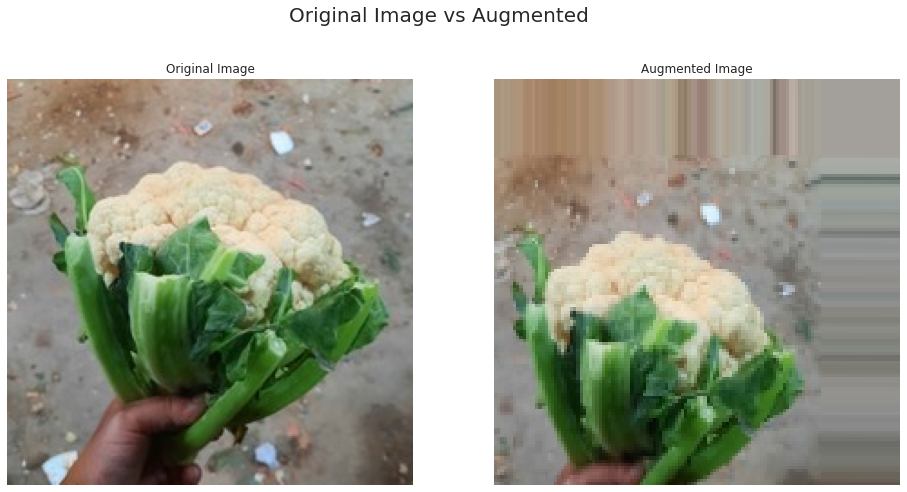

In [19]:
 def augment_image():
    img,label = train_datagen.next()
    randint = np.random.randint(train_datagen.batch_size)


    original_image = plt.imread(train_datagen.filepaths[train_datagen.index_array[(train_datagen.batch_index-1)*BATCH+randint]])
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
    fig.suptitle('Original Image vs Augmented', fontsize=20)
    ax[0].set_title('Original Image')
    ax[0].imshow(original_image)
    ax[0].set_axis_off()
    ax[1].set_title('Augmented Image')
    ax[1].imshow(img[randint])
    ax[1].set_axis_off()
    fig.show()

    print(f'original image size : {original_image.nbytes}')
    print(f'augmented image size : {img[randint].nbytes}')
    
augment_image()


on the left side , we can see the original image. on the right side, we can see the augmented image. we notice that the augmented image is flipped horizontally and now have a low pixel value compare than the original image. for the memory consumption, we can see the augmented image is consume more memory than the original image.

### 6. Model Definition

in this process i will define the model architecture

**Method :**

* i will use sequential model

**Input Layer :**

* for the inpur layers i will use the input_shape parameter with the shape of (128,128,3)

**Convolutional & Pooling Layer :**

* i will use 3 convolutional layer and 3 pooling layer
* for the first convolutional layer i will use the filters parameter with the value of 16 and kernel_size parameter with the value of (3,3)
* for the second convolutional layer i will use the kernel_size parameter with the value of 32 and kernel_size parameter with the value of (3,3)
* for the third convolutional layer i will use the kernel_size parameter with the value of 64 and kernel_size parameter with the value of (3,3)
* for all the pooling layer i will use the pool_size parameter with the value of (2,2)

**fully connected layer :**

* i will use flatten layer 
* i will use dense layer with the value of 128 and activation function as relu

**output layer :**
* i will use dense layer with the value of 15 (class category) and since the target values is multiclass category the activation function is softmax





In [20]:
inputs = [img_height,img_width,3]

model_seq = Sequential()

#Convulutional layer 1
model_seq.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= inputs))
model_seq.add(MaxPooling2D(2))

#Convulutional layer 2
model_seq.add(Conv2D(filters=32, kernel_size=3, activation= 'relu'))
model_seq.add(MaxPooling2D(2))

#Conv 3
model_seq.add(Conv2D(filters=64, kernel_size=3, activation= 'relu'))
model_seq.add(MaxPooling2D(2))

# fully connected layer
model_seq.add(Flatten())
model_seq.add(Dense(units= 128, activation='relu'))
model_seq.add(Dense(units=15, activation='softmax'))

# model summary
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

##### Model Compile
* i will use the optimizer as Adam
* since the target values is multiclass category i will use categorical_crossentropy as loss function
* the metrics is accuracy

In [21]:
model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

### 7. Model Training
in this process i will utilize early stopping and model checkpoint to save the best model. for early stopping i'll set monitor to be 'val_loss' and the patience parameter with the value of 5.

In [22]:
callbacks_1 = [ 
    EarlyStopping(monitor = 'val_loss', patience = 5), 
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

for my baseline model i will use epoch parameter with the value of 30

In [23]:
%%time
history_seq = model_seq.fit(train_ds,
                           validation_data= val_ds,
                           epochs= 30,
                           steps_per_epoch =((15000//BATCH)),
                           validation_steps=((3000//BATCH)),
                           callbacks= callbacks_1)


Epoch 1/30


2022-04-26 03:59:15.845350: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


50/50 [==============================] - 74s 1s/step - loss: 1.9524 - accuracy: 0.3517 - val_loss: 1.3588 - val_accuracy: 0.5533
Epoch 2/30
50/50 [==============================] - 70s 1s/step - loss: 1.2147 - accuracy: 0.6042 - val_loss: 0.8906 - val_accuracy: 0.7007
Epoch 3/30
50/50 [==============================] - 67s 1s/step - loss: 0.9289 - accuracy: 0.6941 - val_loss: 0.7703 - val_accuracy: 0.7213
Epoch 4/30
50/50 [==============================] - 68s 1s/step - loss: 0.7471 - accuracy: 0.7554 - val_loss: 0.6628 - val_accuracy: 0.7793
Epoch 5/30
50/50 [==============================] - 68s 1s/step - loss: 0.6081 - accuracy: 0.8074 - val_loss: 0.5867 - val_accuracy: 0.8003
Epoch 6/30
50/50 [==============================] - 68s 1s/step - loss: 0.5492 - accuracy: 0.8253 - val_loss: 0.6416 - val_accuracy: 0.7877
Epoch 7/30
50/50 [==============================] - 68s 1s/step - loss: 0.4746 - accuracy: 0.8519 - val_loss: 0.4487 - val_accuracy: 0.8560
Epoch 8/30
50/50 [=============

### 8. Model Evaluation

**Loss and Accuracy Curve**

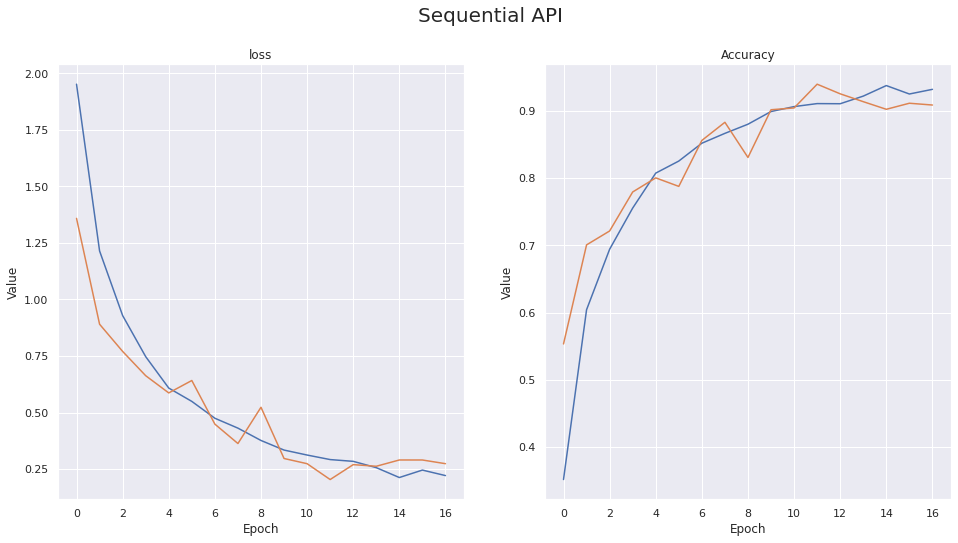

In [24]:
def plot_history(history_name):
    plt.figure(figsize=(16,8))
    plt.suptitle('Sequential API',fontsize=20)

    plt.subplot(1,2,1)
    plt.plot(history_name.history['loss'], label='Training Acc')
    plt.plot(history_name.history['val_loss'], label='Val Acc')
    plt.title('loss')
    plt.ylabel('Value') 
    plt.xlabel('Epoch')

    plt.subplot(1,2,2)
    plt.plot(history_name.history['accuracy'], label='Training Acc')
    plt.plot(history_name.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.ylabel('Value') 
    plt.xlabel('Epoch')


    plt.show()

plot_history(history_seq)


Baseline Model Evaluation Analysis : 

the model stop at epoch 17, its mean that the model already doesnt have any improvement in the validation loss with patience parameter set to 5. total training time for this model is 19 min and 25 sec.

**Loss:**

* for train set we have optimum loss score is 0.2124
* for validation set we have the optimum loss score is  0.2035
* in the validation loss we have gradient exploding problem

**Accuracy:**
* for train set we have the optimum  accuracy score is 0.9376
* for validation set we have the optimum accuracy score is 0.9397
* the validation accuracy have gradient exploding problem


we got an exploding gradient problem for both accuracy and loss so we need to tuning the model to make improvement.

**Evaluate Model with Test Dataset**

load best model

In [25]:
model_seq_best = keras.models.load_model('model_best.hdf5')

Evaluate the model

In [74]:
baseline_train = model_seq_best.evaluate(train_ds,steps=50)
baseline_test = model_seq_best.evaluate(test_datagen)

10/10 [==============================] - 4s 377ms/step - loss: 0.2005 - accuracy: 0.9393


In [75]:
print(f'Train Loss : {baseline_train[0]}, Train Accuracy : {baseline_train[1]}')
print(f'Test Loss : {baseline_test[0]}, Test Accuracy : {baseline_test[1]}')

Train Loss : 0.2678499221801758, Train Accuracy : 0.9187333583831787
Test Loss : 0.2004573941230774, Test Accuracy : 0.9393333196640015


based on the  evaluation result, we can see that the train dataset have an accuracy of 0.9190 and a loss of 0.2678. for test dataset the accuracy is 0.9393 and loss 0.2005. based on the result we can say that's the model is goodfit.

**Classification Report**

In [28]:
ds_test_pred = model_seq_best.predict(test_datagen)
ds_test_pred = np.argmax(ds_test_pred,axis=1)

In [78]:
print(classification_report(test_datagen.labels,ds_test_pred,target_names=list(test_datagen.class_indices)))

              precision    recall  f1-score   support

        Bean       0.93      0.95      0.94       200
Bitter_Gourd       0.87      0.93      0.90       200
Bottle_Gourd       0.95      0.95      0.95       200
     Brinjal       0.93      0.88      0.90       200
    Broccoli       0.86      0.99      0.92       200
     Cabbage       0.92      0.94      0.93       200
    Capsicum       0.98      0.97      0.98       200
      Carrot       1.00      0.96      0.98       200
 Cauliflower       0.97      0.89      0.93       200
    Cucumber       0.93      0.90      0.91       200
      Papaya       0.97      0.87      0.92       200
      Potato       1.00      0.98      0.99       200
     Pumpkin       0.97      0.94      0.95       200
      Radish       0.98      0.99      0.99       200
      Tomato       0.86      0.96      0.91       200

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94   

Based on Classification report, we can see the model could predict all the class with high accuracy, precision, recall and f1 score exceept for class `Bitter_Gourd`, `Broccoli`, and `Tomato`. 

### 9. Model Improvement

in this model improvement process i will define the model architecture

**Method :**

* i will use sequential model

**Input Layer :**

* for the inpur layers i will use the input_shape parameter with the shape of (128,128,3)

**Convolutional & Pooling Layer :**

* i will use 3 convolutional layer and 3 pooling layer
* for the first convolutional layer i will use the filters parameter with the value of 16 and kernel_size parameter with the value of (3,3) and padding parameter with the value of same
* for the second convolutional layer i will use the kernel_size parameter with the value of 32 and kernel_size parameter with the value of (3,3) and padding parameter with the value of same
* for the third convolutional layer i will use the kernel_size parameter with the value of 64 and kernel_size parameter with the value of (3,3) and padding parameter with the value of same
* for all the pooling layer i will use the pool_size parameter with the value of (2,2)

**fully connected layer :**

* i will use flatten layer 
* i will use dense layer with the value of 128 and activation function as relu

**output layer :**
* i will use dense layer with the value of 15 (class category) and since the target values is multiclass category the activation function is softmax

##### Model Definition

In [31]:
inputs = [img_height,img_width,3]

model_seq_imp = Sequential()

#Convulutional layer 1
model_seq_imp.add(Conv2D(filters=16, kernel_size=3, activation= 'relu',padding='SAME', input_shape= inputs))
model_seq_imp.add(MaxPooling2D(2))

#Convulutional layer 2
model_seq_imp.add(Conv2D(filters=32, kernel_size=3, activation= 'relu',padding='SAME'))
model_seq_imp.add(MaxPooling2D(2))

#Convulutional layer 3
model_seq_imp.add(Conv2D(filters=64, kernel_size=3, activation= 'relu',padding='SAME'))
model_seq_imp.add(MaxPooling2D(2))

# fully connected layer
model_seq_imp.add(Flatten())
model_seq_imp.add(Dense(units= 128, activation='relu'))
model_seq_imp.add(Dense(units=15, activation='softmax'))

# model summary
model_seq_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

##### Model Compile
* i will use the optimizer as Adam, in the previous model we have gradient exploding problem so we will use the clipping value of 1.0 to solve this problem
* since the target values is multiclass category i will use categorical_crossentropy as loss function
* the metrics is accuracy

In [32]:
model_seq_imp.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=1.0), loss='categorical_crossentropy', metrics= ['accuracy'])

In [33]:
callbacks_2 = [ 
    EarlyStopping(monitor = 'val_loss', patience = 5), 
    ModelCheckpoint('model_best_improvement.hdf5', monitor='val_loss', save_best_only=True)
]

##### Model Training

in this process i will utilize early stopping and model checkpoint to save the best model. for early stopping i'll set monitor to be 'val_loss' and  the patience parameter with the value of 5.

In [34]:
%%time
history_imp= model_seq_imp.fit(train_ds,
                           validation_data= val_ds,
                           epochs= 30,
                           steps_per_epoch =((15000//BATCH)),
                           validation_steps=((3000//BATCH)),
                           callbacks= callbacks_2)


Epoch 1/30
50/50 [==============================] - 74s 1s/step - loss: 2.2789 - accuracy: 0.2382 - val_loss: 1.6216 - val_accuracy: 0.4913
Epoch 2/30
50/50 [==============================] - 70s 1s/step - loss: 1.4510 - accuracy: 0.5203 - val_loss: 1.1946 - val_accuracy: 0.5870
Epoch 3/30
50/50 [==============================] - 69s 1s/step - loss: 1.0591 - accuracy: 0.6513 - val_loss: 0.8246 - val_accuracy: 0.7287
Epoch 4/30
50/50 [==============================] - 67s 1s/step - loss: 0.8484 - accuracy: 0.7268 - val_loss: 0.6315 - val_accuracy: 0.8017
Epoch 5/30
50/50 [==============================] - 68s 1s/step - loss: 0.6897 - accuracy: 0.7793 - val_loss: 0.5547 - val_accuracy: 0.8193
Epoch 6/30
50/50 [==============================] - 68s 1s/step - loss: 0.6005 - accuracy: 0.8060 - val_loss: 0.4511 - val_accuracy: 0.8523
Epoch 7/30
50/50 [==============================] - 68s 1s/step - loss: 0.4989 - accuracy: 0.8407 - val_loss: 0.4887 - val_accuracy: 0.8320
Epoch 8/30
50/50 [==

##### Model Improvement Evaluation

**Loss and Accuracy Curve**

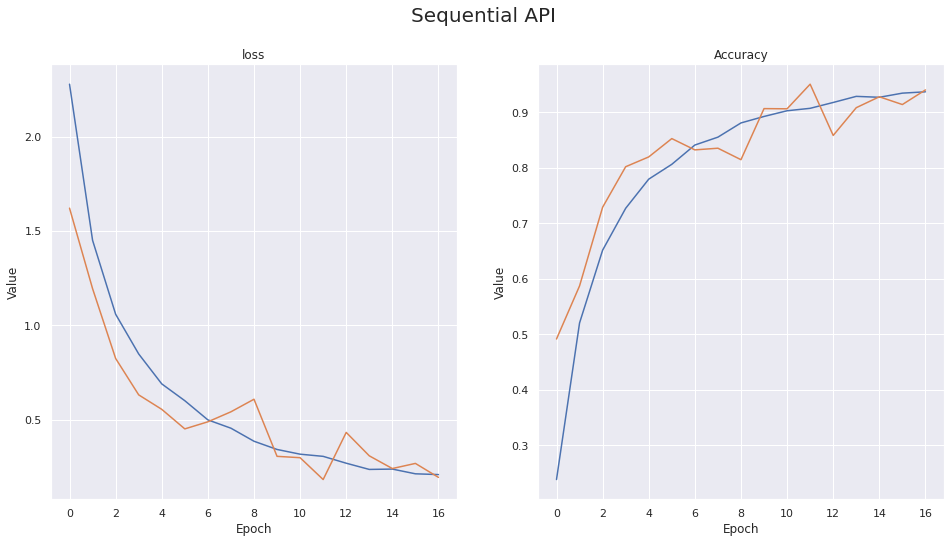

In [59]:
plot_history(history_imp)

Model Improvement Evaluation Analysis : 

the model stop at epoch 17, its mean that the model already doesnt have any improvement in the validation loss with patience parameter set to 5. total training time for this model is 19 min and 23 sec. only a little bit faster than baseline model

**Loss:**

* for train set we have optimum loss score is 0.2088
* for validation set we have the optimum loss score is  0.1826
* in the validation loss we still have gradient exploding problem

**Accuracy:**
* for train set we have the optimum  accuracy score is 0.9366
* for validation set we have the optimum accuracy score is 0.9400
* the validation accuracy we still have gradient exploding problem


for model improvement we still got an exploding gradient problem for both accuracy and loss.

##### Evaluate model improvement with test dataset

load best model

In [41]:
model_inf = keras.models.load_model('model_best_improvement.hdf5')

evaluate the model

In [76]:
improve_train = model_seq_imp.evaluate(train_ds,steps=50)
improve_test = model_seq_imp.evaluate(test_datagen)

10/10 [==============================] - 4s 376ms/step - loss: 0.1855 - accuracy: 0.9457


In [77]:
print(f'Train Loss : {improve_train[0]}, Train Accuracy : {improve_train[1]}')
print(f'Test Loss : {improve_test[0]}, Test Accuracy : {improve_test[1]}')

Train Loss : 0.18332237005233765, Train Accuracy : 0.9453999996185303
Test Loss : 0.1854812651872635, Test Accuracy : 0.9456666707992554


based on the  evaluation result, we can see that the train dataset have an accuracy of 0.9473 and a loss of 0.1850. for test dataset the accuracy is 0.9475 and loss 0.1855. based on the accuracy and loss score, we can say that our improvement model is better than our baseline model.

Classification Report

In [44]:
ds_test_imp_pred = model_inf.predict(test_datagen)
ds_test_imp_pred = np.argmax(ds_test_imp_pred,axis=1)

In [45]:
print(classification_report(test_datagen.labels,ds_test_imp_pred,target_names=list(test_datagen.class_indices)))

              precision    recall  f1-score   support

        Bean       0.96      0.94      0.95       200
Bitter_Gourd       0.96      0.96      0.96       200
Bottle_Gourd       0.97      0.99      0.98       200
     Brinjal       0.90      0.94      0.92       200
    Broccoli       0.82      0.98      0.89       200
     Cabbage       0.89      0.89      0.89       200
    Capsicum       1.00      0.98      0.99       200
      Carrot       0.99      0.99      0.99       200
 Cauliflower       0.91      0.94      0.93       200
    Cucumber       0.97      0.98      0.98       200
      Papaya       0.99      0.90      0.94       200
      Potato       0.99      0.99      0.99       200
     Pumpkin       0.99      0.85      0.92       200
      Radish       0.99      0.99      0.99       200
      Tomato       0.98      0.90      0.94       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95   

Based on Classification report, we can see the model could predict all the class with high accuracy, precision, recall and f1 score exceept for class `Broccoli`.

##### Evalaute the incorrect prediction

In [46]:
df_eval = pd.DataFrame({ 'Actual_value' : list(test_datagen.labels), 'predicted_value' : list(ds_test_imp_pred)}) 

# create inverse mapping
inv_map = {v: k for k, v in test_datagen.class_indices.items()}

# map the predicted values & true values to the original labels
df_eval['Actual_value'] = df_eval['Actual_value'].map(inv_map)
df_eval['predicted_value'] = df_eval['predicted_value'].map(inv_map)


df_eval_query = df_eval[df_eval['Actual_value'] != df_eval['predicted_value']]
df_eval_query.head()

Actual_value predicted_value
8          Bean    Bitter_Gourd
51         Bean         Brinjal
52         Bean        Cucumber
63         Bean        Cucumber
72         Bean        Cucumber

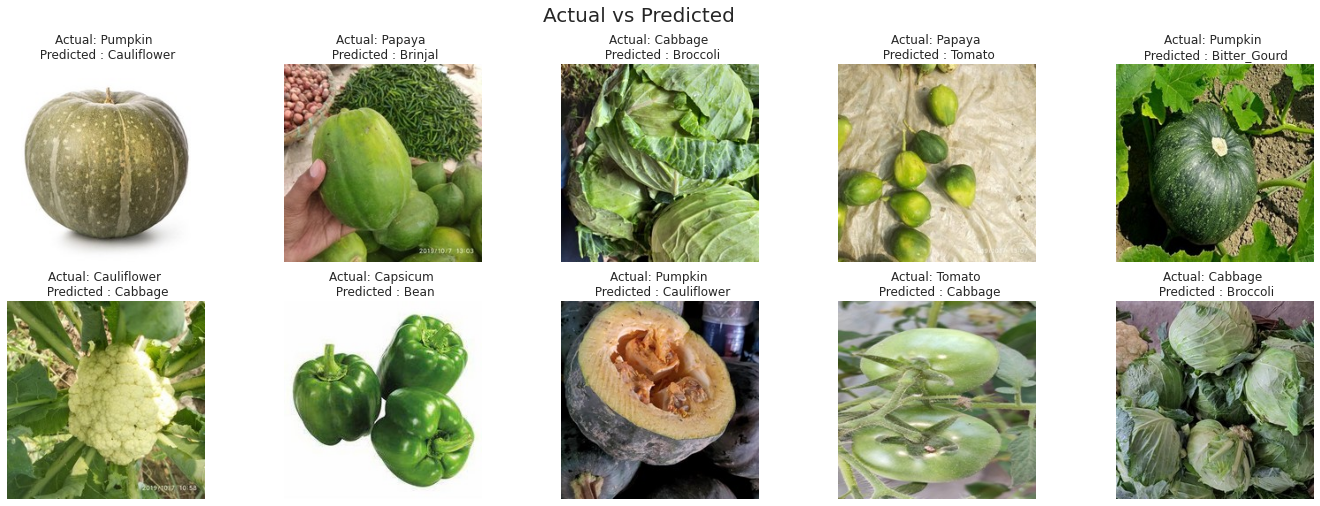

In [64]:
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(24,8))
fig.suptitle('Actual vs Predicted', fontsize=20)
for i in range(10):
        randint = np.random.randint(df_eval_query.shape[0])
        random_index = df_eval_query.iloc[randint].name
        img = plt.imread(test_datagen.filepaths[random_index])
        ax[i//5,i%5].set_title(f'Actual: {df_eval_query.iloc[randint][0]} \n Predicted : {df_eval_query.iloc[randint][1]}')
        ax[i//5,i%5].set_axis_off()
        ax[i//5,i%5].imshow(img)                      

Analysis : 

we can see the majority of the wrong predicted class have the similar color (greens), it could be the model is hardly tell the different between each class if the class have similar color.

### 10. Model Saving

### 11. Model Inference

##### Load best model

In [65]:
model_inf = keras.models.load_model('model_best_improvement.hdf5')

##### Load image

In [66]:
def load_image_inf(path):
    x = tf.io.read_file(path)
    x = tf.image.decode_jpeg(x)
    x_ori = x
    x = tf.image.resize_with_pad(x, 128, 128)
    x = tf.cast(x,tf.float32)/255.
    return x, x_ori

##### Predict

In [67]:
def predict(path):
    inf, inf_ori = load_image_inf(path) 
    res = model_inf.predict(x=np.expand_dims(inf, axis=0))
    res = np.argmax(res,axis=1)
    res = res.item()
    inv_map = {v: k for k, v in test_datagen.class_indices.items()}
    inv_map.get(res)

    plt.figure(figsize=(15,10))
    plt.title('Predicted : ' + inv_map.get(res))
    plt.axis('off')
    plt.imshow(inf_ori)
    plt.show()

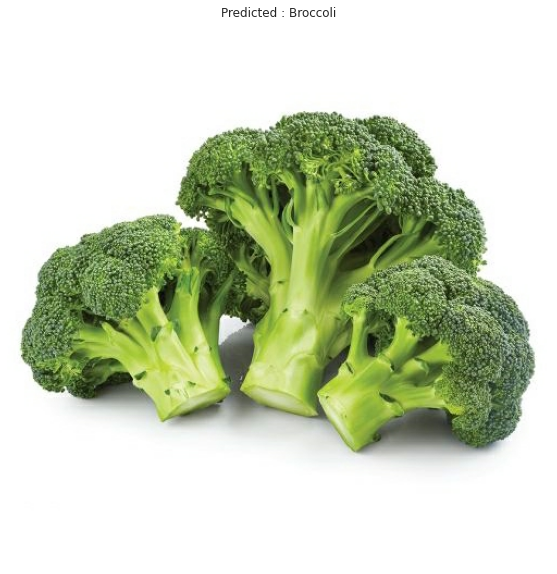

In [68]:
predict('inference/brocoli_inf.jpeg')

although the precission score for the model to correctly predict `Brocolli` is low than others, the model is still able to predict correctly.

### 12. Conclusion

### EDA Analysis

**Dataset Analysis**

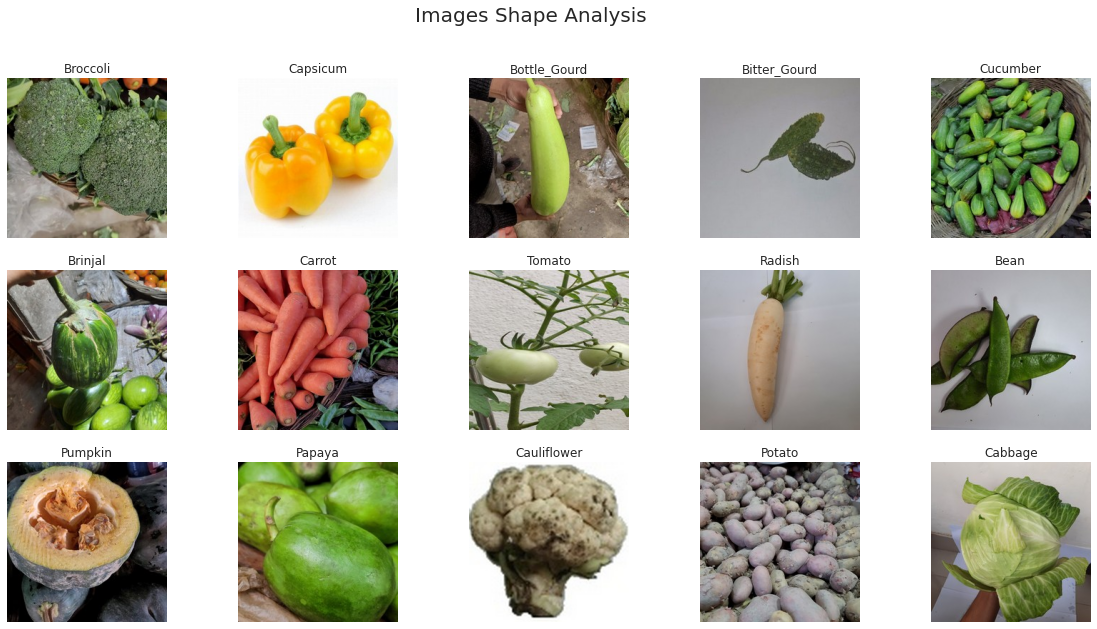

In [52]:
plot_each_image()

* in this dataset we have 15 Classes of Vegetables.
* Each Class have 1400 images.

**Images Metadata Analysis**

* image Shape

image path
shape                    
(187, 224, 3)           1
(193, 224, 3)           1
(198, 224, 3)           1
(200, 224, 3)           1
(205, 224, 3)           1
(207, 224, 3)           1
(210, 224, 3)           1
(211, 224, 3)           1
(223, 224, 3)           1
(224, 224, 3)       20991

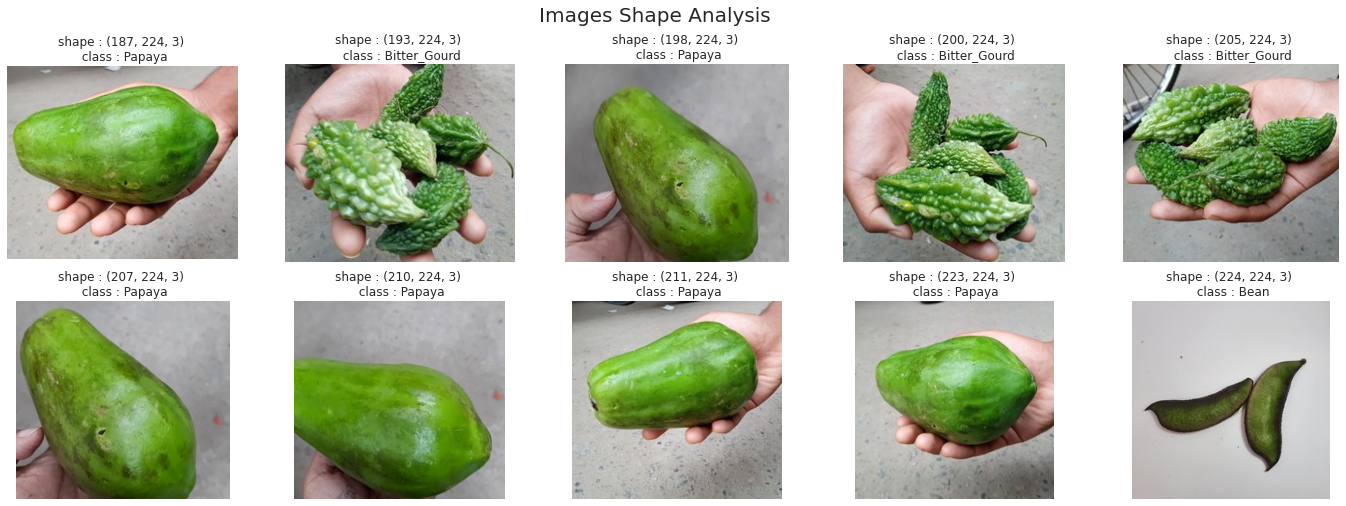

In [53]:
plot_image_shape()


we have 10 types of images shapes, if we see the dataframe, its almost 99.99% of images is belong to 224 * 224 pixel. it's seems only `papaya` and `bitter gourd` have different image shape, the smallest image is 187 * 224 pixel and the largest image is 224 * 224 pixel. 

* Image Memory Consumption Size

In [54]:
image_size

image size(byte)                             
                      count     min     max         mean
type                                                    
test                   3000  139104  150528  150524.1920
train                 15000  129696  150528  150522.3104
validation             3000  125664  150528  150519.4880

we can see that for data train, validation, and test the average size of the images memory consumption is around 150 KB.


* Image Channel

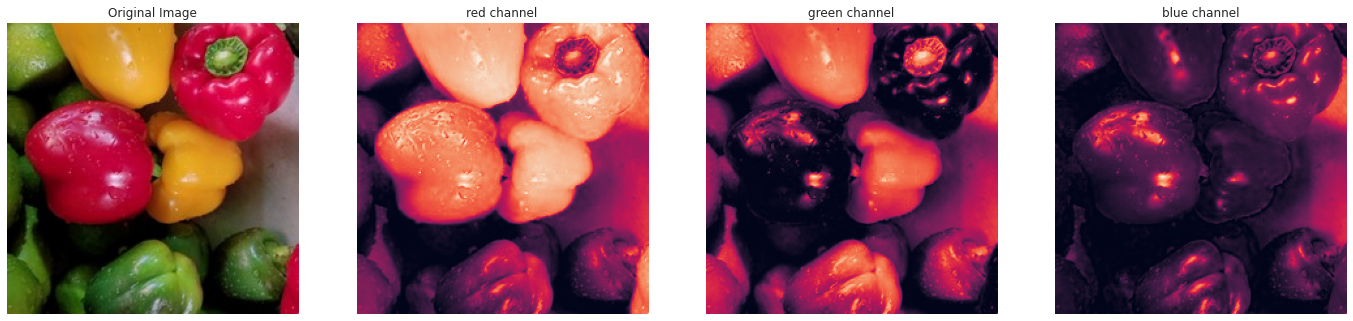

In [55]:
image_channel()

the images is in RGB format, based on graph above we can see the visualization for each channel.

* Image Augmentation

original image size : 150528
augmented image size : 196608


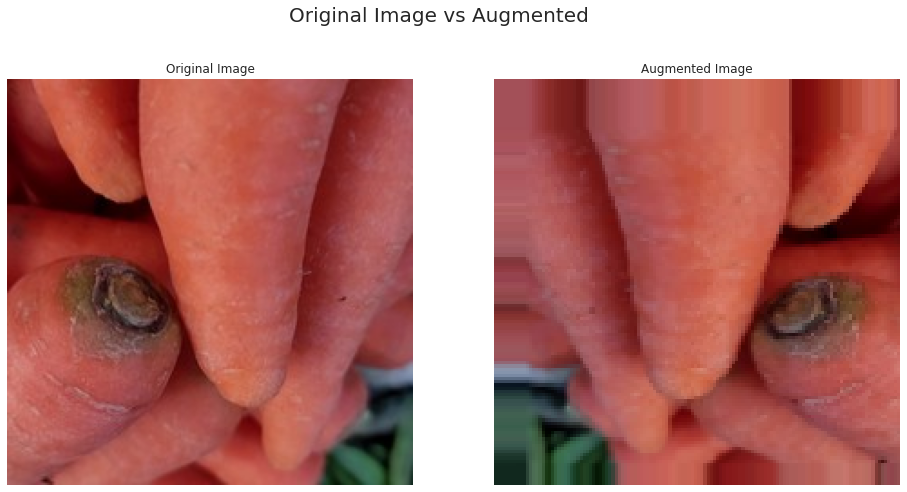

In [56]:
augment_image()

on the left side , we can see the original image. on the right side, we can see the augmented image. we notice that the augmented image is flipped horizontally and now have a low pixel value compare than the original image. for the memory consumption, we can see the augmented image is consume more memory than the original image.

### Model Analysis

##### Baseline Model

**Accuracy and Loss Curve**

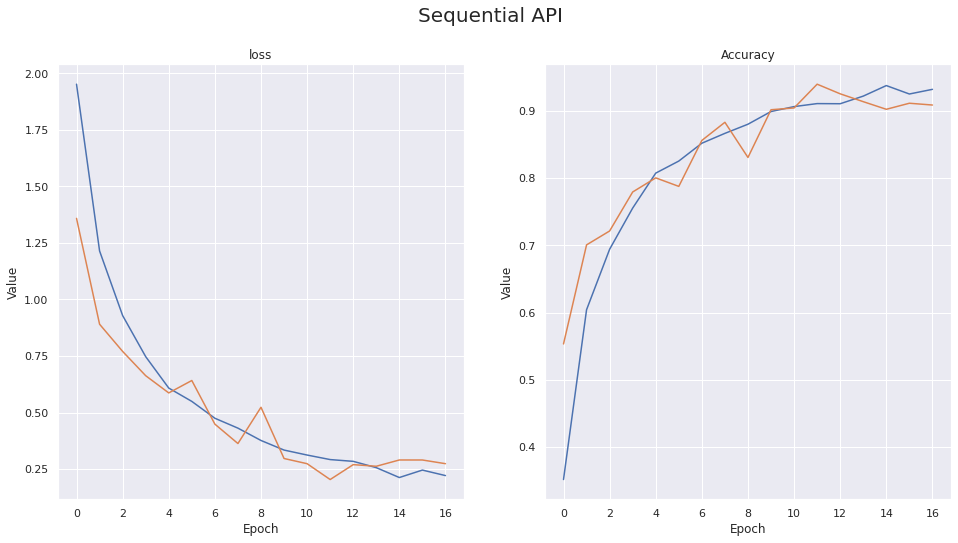

In [69]:
plot_history(history_seq)

Baseline Model Evaluation Analysis : 

the model stop at epoch 17, its mean that the model already doesnt have any improvement in the validation loss with patience parameter set to 5. total training time for this model is 19 min and 25 sec.

**Loss:**

* for train set we have optimum loss score is 0.2124
* for validation set we have the optimum loss score is  0.2035
* in the validation loss we have gradient exploding problem

**Accuracy:**
* for train set we have the optimum  accuracy score is 0.9376
* for validation set we have the optimum accuracy score is 0.9397
* the validation accuracy have gradient exploding problem


we got an exploding gradient problem for both accuracy and loss so we need to tuning the model to make improvement.

**Evaluate Model With Test Dataset**

In [79]:
print(f'Train Loss : {baseline_train[0]}, Train Accuracy : {baseline_train[1]}')
print(f'Test Loss : {baseline_test[0]}, Test Accuracy : {baseline_test[1]}')

Train Loss : 0.2678499221801758, Train Accuracy : 0.9187333583831787
Test Loss : 0.2004573941230774, Test Accuracy : 0.9393333196640015


based on the  evaluation result, we can see that the train dataset have an accuracy of 0.9190 and a loss of 0.2678. for test dataset the accuracy is 0.9393 and loss 0.2005. based on the result we can say that's the model is goodfit.

In [80]:
print(classification_report(test_datagen.labels,ds_test_pred,target_names=list(test_datagen.class_indices)))

              precision    recall  f1-score   support

        Bean       0.93      0.95      0.94       200
Bitter_Gourd       0.87      0.93      0.90       200
Bottle_Gourd       0.95      0.95      0.95       200
     Brinjal       0.93      0.88      0.90       200
    Broccoli       0.86      0.99      0.92       200
     Cabbage       0.92      0.94      0.93       200
    Capsicum       0.98      0.97      0.98       200
      Carrot       1.00      0.96      0.98       200
 Cauliflower       0.97      0.89      0.93       200
    Cucumber       0.93      0.90      0.91       200
      Papaya       0.97      0.87      0.92       200
      Potato       1.00      0.98      0.99       200
     Pumpkin       0.97      0.94      0.95       200
      Radish       0.98      0.99      0.99       200
      Tomato       0.86      0.96      0.91       200

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94   

Based on Classification report, we can see the model could predict all the class with high accuracy, precision, recall and f1 score exceept for class `Bitter_Gourd`, `Broccoli`, and `Tomato`. 

##### Improvement Model

**Accuracy and Loss Curve**

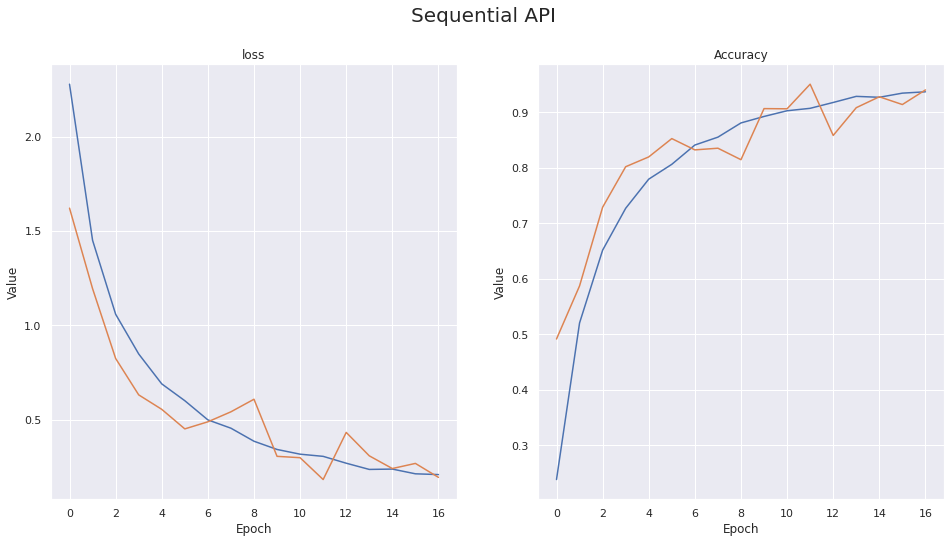

In [70]:
plot_history(history_imp)

Model Improvement Evaluation Analysis : 

the model stop at epoch 17, its mean that the model already doesnt have any improvement in the validation loss with patience parameter set to 5. total training time for this model is 19 min and 23 sec. only a little bit faster than baseline model

**Loss:**

* for train set we have optimum loss score is 0.2088
* for validation set we have the optimum loss score is  0.1826
* in the validation loss we still have gradient exploding problem

**Accuracy:**
* for train set we have the optimum  accuracy score is 0.9366
* for validation set we have the optimum accuracy score is 0.9400
* the validation accuracy we still have gradient exploding problem


for model improvement we still got an exploding gradient problem for both accuracy and loss.

**Evaluation Model With Test Dataset**

In [81]:
print(f'Train Loss : {improve_train[0]}, Train Accuracy : {improve_train[1]}')
print(f'Test Loss : {improve_test[0]}, Test Accuracy : {improve_test[1]}')

Train Loss : 0.18332237005233765, Train Accuracy : 0.9453999996185303
Test Loss : 0.1854812651872635, Test Accuracy : 0.9456666707992554


based on the  evaluation result, we can see that the train dataset have an accuracy of 0.9473 and a loss of 0.1850. for test dataset the accuracy is 0.9475 and loss 0.1855. based on the accuracy and loss score, we can say that our improvement model is better than our baseline model.

In [83]:
print(classification_report(test_datagen.labels,ds_test_imp_pred,target_names=list(test_datagen.class_indices)))

              precision    recall  f1-score   support

        Bean       0.96      0.94      0.95       200
Bitter_Gourd       0.96      0.96      0.96       200
Bottle_Gourd       0.97      0.99      0.98       200
     Brinjal       0.90      0.94      0.92       200
    Broccoli       0.82      0.98      0.89       200
     Cabbage       0.89      0.89      0.89       200
    Capsicum       1.00      0.98      0.99       200
      Carrot       0.99      0.99      0.99       200
 Cauliflower       0.91      0.94      0.93       200
    Cucumber       0.97      0.98      0.98       200
      Papaya       0.99      0.90      0.94       200
      Potato       0.99      0.99      0.99       200
     Pumpkin       0.99      0.85      0.92       200
      Radish       0.99      0.99      0.99       200
      Tomato       0.98      0.90      0.94       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95   

Based on Classification report, we can see the model could predict all the class with high accuracy, precision, recall and f1 score exceept for class `Broccoli` and `Cabbage`